In [110]:
import pandas as pd
import networkx as nx
movies = pd.read_csv(r'data\Kaggle\Mojo_budget_update.csv\Mojo_budget_update.csv')
# remove a column mpaa
movies = movies.drop(columns=['mpaa'])
# remove rows with nan in worldwide
movies = movies.dropna(subset=["worldwide"])
# fill nan with unknown
movies = movies.fillna("UNKNOWN",)
# number of nan in each column 
# {'mpaa': 161, 'release_date': 1, 'distributor': 15, 'writer': 9, 'producer': 13, 'composer': 105, 'cinematographer': 114, 
# 'main_actor_4': 3, 'domestic': 19, 'international': 410, 'worldwide': 7, 'genre_2': 281, 'genre_3': 1022, 'genre_4': 2120}

#Make a graph
movie_graph = nx.Graph()
movie_graph.add_nodes_from(movies['title'])
# reformat the date
def getDate(year,date):
    dict_months = {'January':"1", 'February':"2", 'March':"3", 'April':"4", 'May':"5", 'June':"6", 'July':"7", 'August':"8", 'September':"9", 'October':"10", 'November':"11", 'December':"12"}
    try:
        date = date.split()
    except:
        date = ['January','1']
    year = str(year)
    date = str(date[1]) + '-' + dict_months[date[0]] + '-' + year
    return date
# reformat the run time
def getRunTime(run_time):
    try:
        run_time = run_time.split()
        run_time = run_time[0] * 60 + run_time[2]
    except:
        run_time = "UNKNOWN"
    return run_time

# add attributes to the nodes#mpaa is after the release year
for node in movie_graph.nodes:
    row = movies.loc[movies['title'] == node]
    movie_id, _,release_year,_,release_date, run_time, distributor, director, writer, producer, composer, cinematographer, \
    main_actor_1, main_actor_2, main_actor_3, main_actor_4, budget, domestic, international, worldwide, \
    genre_1, genre_2, genre_3, genre_4, link = row.iloc[0, :].values

    release_date = getDate(release_year, release_date)
    run_time = getRunTime(run_time)
    actors = [main_actor_1, main_actor_2, main_actor_3, main_actor_4]
    genres = [genre_1, genre_2, genre_3, genre_4]
    
    movie_graph.nodes[node]['movie_id'] = movie_id
    movie_graph.nodes[node]['release_year'] = release_year
    movie_graph.nodes[node]['release_date'] = release_date
    movie_graph.nodes[node]['run_time'] = run_time
    movie_graph.nodes[node]['distributor'] = distributor
    movie_graph.nodes[node]['director'] = director
    movie_graph.nodes[node]['writer'] = writer
    movie_graph.nodes[node]['producer'] = producer
    movie_graph.nodes[node]['composer'] = composer
    movie_graph.nodes[node]['cinematographer'] = cinematographer
    movie_graph.nodes[node]['actors'] = actors
    movie_graph.nodes[node]['budget'] = budget
    movie_graph.nodes[node]['domestic'] = domestic
    movie_graph.nodes[node]['international'] = international
    movie_graph.nodes[node]['worldwide'] = worldwide
    movie_graph.nodes[node]['genres'] = genres
    movie_graph.nodes[node]['link'] = link


In [111]:
print("Number of nodes", len(movie_graph.nodes)) 
print("Number of unique distributor", len(movies["distributor"].unique()))
# print("precentag of movies per distributor" , movies["distributor"].value_counts())
print(f"Budget Stats \n mean is {round(movies["budget"].mean())}, midian is {movies["budget"].median()}, standard deviation budget is { round(movies["budget"].std())}")
print(f"worldwide Stats \n mean is {round(movies["worldwide"].mean())}, midian is {movies['worldwide'].median()}, standard deviation worldwide is { round(movies['worldwide'].std())}")
print("Number of unique genres", len(movies["genre_1"].unique()))
print("Number of unique actors", len((movies["main_actor_1"]+movies["main_actor_2"]+movies["main_actor_3"]+movies["main_actor_4"]).unique()))
print(f"Number of unique directors {len(movies['director'].unique())} writers {len(movies['writer'].unique())} and producers {len(movies['producer'].unique())} and composers {len(movies['composer'].unique())} and cinematographers {len(movies['cinematographer'].unique())}")
print(f"Earnings Stats \n mean is {round(movies['worldwide'].mean())-round(movies['budget'].mean())}, midian is {movies['worldwide'].median()-movies['budget'].median()}")
print("biggest Winner is ", movies.loc[(movies['worldwide']-movies['budget']).idxmax()]['title'])
print("biggest Loser is ", movies.loc[(movies['worldwide']-movies['budget']).idxmin()]['title'])
print("Movies released per year", movies['year'].value_counts(ascending=True))

Number of nodes 3208
Number of unique distributor 197
Budget Stats 
 mean is 46308759, midian is 30000000.0, standard deviation budget is 47097816
worldwide Stats 
 mean is 139312154, midian is 62251587.5, standard deviation worldwide is 216210703
Number of unique genres 15
Number of unique actors 3212
Number of unique directors 1520 writers 2103 and producers 1539 and composers 792 and cinematographers 854
Earnings Stats 
 mean is 93003395, midian is 32251587.5
biggest Winner is  Avatar
biggest Loser is  Mars Needs Moms
Movies released per year year
2020     14
1990     19
1993     29
1992     29
1995     38
1996     40
1991     47
1994     51
1997     70
1998     81
2007     94
2018     97
2017     98
2012    113
2015    113
2019    114
2016    119
2014    119
2013    126
2008    131
2006    142
2003    144
2011    146
2001    146
2000    147
2004    154
2005    156
2002    159
1999    160
2009    166
2010    174
Name: count, dtype: int64


In [112]:
movies[movies['title'] == 'The Matrix']

,movie_id,title,year,trivia,release_date,run_time,distributor,director,writer,producer,...,main_actor_4,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4,html
464,tt0133093,The Matrix,1999,A computer hacker learns from mysterious rebel...,March 31,2 hr 16 min,Warner Bros.,Lana Wachowski,Lilly Wachowski,Joel Silver,...,Hugo Weaving,63000000.0,171479930.0,293863857.0,465343787.0,Action,Sci-Fi,UNKNOWN,UNKNOWN,https://www.boxofficemojo.com/title/tt0133093/...


In [113]:
reviews = pd.read_csv(r'data\Kaggle\Rotten_Tomatoes\rotten_tomatoes_movie_reviews.csv')
reviews=reviews[["id","reviewId","reviewText"]]
reviews = reviews.dropna(subset=["reviewText"])
RT_movies = pd.read_csv(r'data\Kaggle\Rotten_Tomatoes\rotten_tomatoes_movies.csv')
RT_movies=RT_movies[["id","title"]]
merged_reviews = pd.merge(RT_movies, reviews, on='id')
merged_reviews = pd.merge(merged_reviews, movies, on='title')
print(merged_reviews.columns)

Index(['id', 'title', 'reviewId', 'reviewText', 'movie_id', 'year', 'trivia',
       'release_date', 'run_time', 'distributor', 'director', 'writer',
       'producer', 'composer', 'cinematographer', 'main_actor_1',
       'main_actor_2', 'main_actor_3', 'main_actor_4', 'budget', 'domestic',
       'international', 'worldwide', 'genre_1', 'genre_2', 'genre_3',
       'genre_4', 'html'],
      dtype='object')


In [114]:
print("number of moveis with reviews", len(merged_reviews['title'].unique()))
print("number of reviews", len(merged_reviews['reviewId'].unique()))
print("number of reviews per movie", merged_reviews['title'].value_counts(ascending=False))
print(f"mean number of reviews per movie {merged_reviews['title'].value_counts().mean()} median {merged_reviews['title'].value_counts().median()}")
print("number of movies with more than 50 reviews", len(merged_reviews['title'].value_counts()[merged_reviews['title'].value_counts()>50]))
print(f"The mean length of reviews is {merged_reviews['reviewText'].apply(len).mean()} and the median is {merged_reviews['reviewText'].apply(len).median()}")
print(f"The mean number of words in reviews is {merged_reviews['reviewText'].apply(lambda x: len(x.split())).mean()} and the median is {merged_reviews['reviewText'].apply(lambda x: len(x.split())).median()}")

number of moveis with reviews 2932
number of reviews 413562
number of reviews per movie title
Parasite                1921
Beauty and the Beast    1168
The Lion King           1122
Godzilla                1084
Little Women            1038
                        ... 
The Lorax                  1
Royal Kill                 1
A Long Way Off             1
Beat the Drum              1
Alone Yet Not Alone        1
Name: count, Length: 2932, dtype: int64
mean number of reviews per movie 146.55388813096863 median 130.0
number of movies with more than 50 reviews 2448
The mean length of reviews is 127.99440301980935 and the median is 127.0
The mean number of words in reviews is 21.466581024724455 and the median is 21.0


In [115]:
dict_edges = {}
movies_used = list(merged_reviews['title'].unique())
for  movie in movies_used:
    for actor in movies[movies['title'] == movie][['main_actor_1', 'main_actor_2', 'main_actor_3', 'main_actor_4']].values[0]:
        if actor in dict_edges:
            dict_edges[actor].append(movie)
        else:
            dict_edges[actor] = [movie]
# remove unknown 
# removies not in dict
# add edges
dict_edges.pop('UNKNOWN', None)
all_nodes = list(set((sum(list(dict_edges.values()),[]))))
movies_to_remove = [node for node in movie_graph.nodes if node not in all_nodes]
print(movies_to_remove)
movie_graph.remove_nodes_from(movies_to_remove)
for actor, moviesls in dict_edges.items():
    for movie1 in moviesls:
        for movie2 in moviesls:
            if movie1 != movie2:
                movie_graph.add_edge(movie1, movie2, actor=actor)
## delete isolated nodes
isolated_nodes = list(nx.isolates(movie_graph))
movie_graph.remove_nodes_from(isolated_nodes)


['Dances with Wolves', 'The Godfather: Part III', 'Boyz n the Hood', 'The Naked Gun 2½: The Smell of Fear', 'Nothing But Trouble', 'Scenes from a Mall', 'Sleeping with the Enemy', 'The Twin Dragons', 'Heaven & Earth', "Wayne's World 2", 'Dumb and Dumber', "I'll Do Anything", 'Interview with the Vampire: The Vampire Chronicles', 'Rapa Nui', 'Ri¢hie Ri¢h', 'Spanking the Monkey', 'Star Trek: Generations', 'Tall Tale', 'The Legend of Drunken Master', 'Die Hard with a Vengeance', 'Man with a Plan', 'Se7en', 'Steal Big Steal Little', 'Albino Alligator', 'Beavis and Butt-Head Do America', 'Kama Sutra: A Tale of Love', 'Alien: Resurrection', 'Dream with the Fishes', 'Hurricane Streets', 'I Married a Strange Person!', 'Mousehunt', 'Monument Ave.', 'Starship Troopers', 'Living Out Loud', 'Mafia!', 'Mission: Impossible II', 'Tea with Mussolini', 'Star Wars: Episode I - The Phantom Menace', 'Star Wars: Episode II - Attack of the Clones', 'Star Wars: Episode III - Revenge of the Sith', 'Blast from 

In [116]:
print("Number of edges", len(movie_graph.edges))
print("Number of nodes", len(movie_graph.nodes))
# degree stats
print("max degree", max(dict(movie_graph.degree()).values()))
print("min degree", min(dict(movie_graph.degree()).values()))
print("mean degree", round(sum(dict(movie_graph.degree()).values())/len(movie_graph.nodes)))
print("median degree", sorted(dict(movie_graph.degree()).values())[len(movie_graph.nodes)//2])
print("number of 0 degree nodes", len([node for node in movie_graph.nodes if movie_graph.degree[node] == 0]))
print("number of nodes", len(movie_graph.nodes))
print("movies with 0 degree", [node for node in movie_graph.nodes if movie_graph.degree[node] == 0])

Number of edges 37774
Number of nodes 2799
max degree 91
min degree 1
mean degree 27
median degree 26
number of 0 degree nodes 0
number of nodes 2799
movies with 0 degree []


Text(0, 0.5, 'Number of nodes')

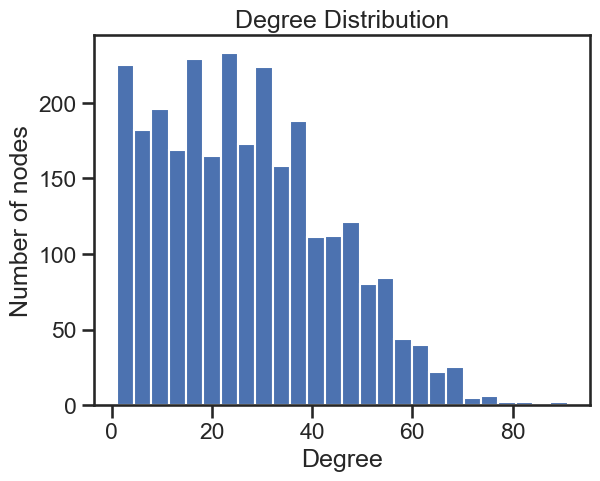

In [117]:
import matplotlib.pyplot as plt
import numpy as np
data = list(dict(movie_graph.degree()).values())
bin_edges = np.histogram_bin_edges(data, bins='auto')
data = list(dict(movie_graph.degree()).values())
plt.hist(dict(movie_graph.degree()).values(),bin_edges)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")


In [118]:
# get budget of matrix
print(movie_graph.nodes['The Matrix']['budget'])
print([node["budget"] for node in movie_graph.nodes.values() ])

63000000.0
[np.float64(40000000.0), np.float64(47000000.0), np.float64(47000000.0), np.float64(70000000.0), np.float64(35000000.0), np.float64(22000000.0), np.float64(40000000.0), np.float64(18000000.0), np.float64(30000000.0), np.float64(15000000.0), np.float64(6000000.0), np.float64(14000000.0), np.float64(13500000.0), np.float64(65000000.0), np.float64(30000000.0), np.float64(17000000.0), np.float64(48000000.0), np.float64(27000000.0), np.float64(3000000.0), np.float64(18000000.0), np.float64(17000000.0), np.float64(13000000.0), np.float64(40000000.0), np.float64(11000000.0), np.float64(23000000.0), np.float64(300000.0), np.float64(70000000.0), np.float64(26000000.0), np.float64(5000000.0), np.float64(65000000.0), np.float64(14000000.0), np.float64(13000000.0), np.float64(5000000.0), np.float64(4500000.0), np.float64(26000000.0), np.float64(17000000.0), np.float64(8000000.0), np.float64(14000000.0), np.float64(7500000.0), np.float64(11000000.0), np.float64(48000000.0), np.float64(35